# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [77]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Import the packages that we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [79]:
# Load the Iris dataset from seaborn
dataset = sns.load_dataset('iris')

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [80]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. Drop rows with any missing values


In [81]:
# Check for missing data
missing_data = dataset.isnull().sum()
print("Missing Data:\n", missing_data)

# Create a new dataset without missing data (if any)
dataset.dropna()

Missing Data:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


3. Encoding the class label categorical column: from string to num


In [82]:
# Encoding the categorical column
dataset['species'] = dataset['species'].astype('category')
dataset['species'] = dataset['species'].cat.codes
#Visualize the dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [83]:
# Drop out non necesary columns
petals = dataset.drop(['sepal_length', 'sepal_width'],axis='columns')

#Visualize the dataset
petals

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

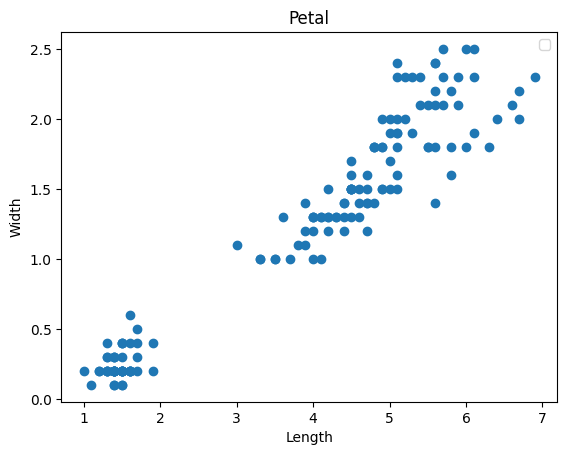

In [84]:
# Scatter plot of each real cluster
plt.scatter(petals['petal_length'],petals['petal_width'])

# Plot labels
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

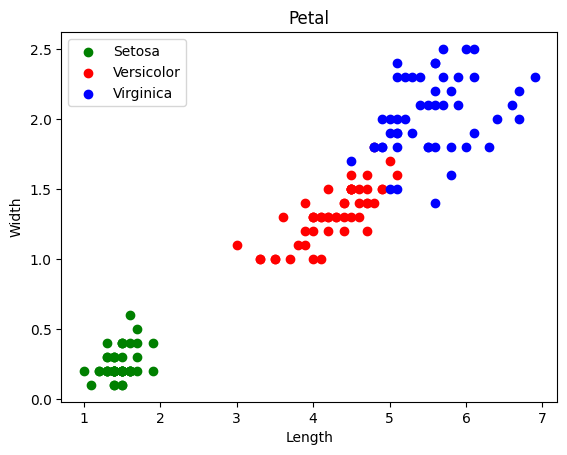

In [85]:
# Get dataframes for each real cluster
df1 = petals[petals['species'] == 0]
df2 = petals[petals['species'] == 1]
df3 = petals[petals['species'] == 2]

# Scatter plot of each real cluster
plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')

# Plot labels
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [86]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
# Define number of clusters
k=3
km = KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)
FlowePRedicted = km.fit_predict(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
FlowePRedicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [87]:
# Manual pairing the labels of the real and estimated clusters
for i in range(len(FlowePRedicted)):
    if FlowePRedicted[i] == 0:
        FlowePRedicted[i] = 1
    elif FlowePRedicted[i] == 1:
        FlowePRedicted[i] = 2
    elif FlowePRedicted[i] == 2:
        FlowePRedicted[i] = 0

In [88]:
# Add a new column to the dataset with the cluster information
dataset['Cluster'] = FlowePRedicted
dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [89]:
# Laber of the estimated clusters
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


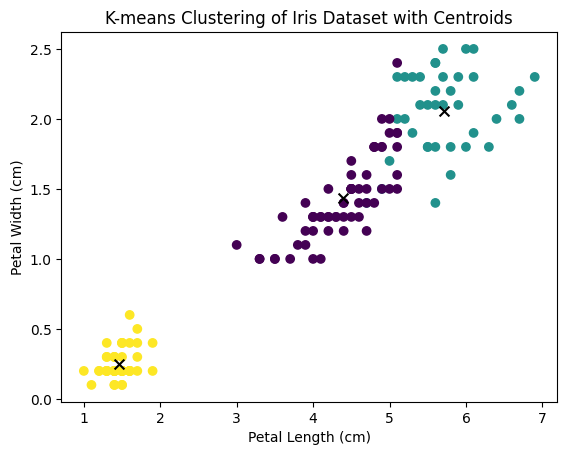

In [90]:
# Cluster centroides
plt.scatter(dataset['petal_length'], dataset['petal_width'], c=dataset['Cluster'])

centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=50)

plt.title("K-means Clustering of Iris Dataset with Centroids")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [91]:
# Sum of squared error (sse) of the final model
print(km.inertia_)

78.85566582597727


In [92]:
# The number of iterations required to converge
print(km.n_iter_)

4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

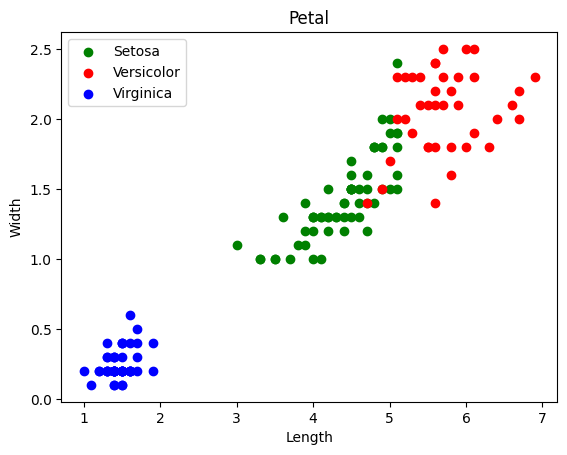

In [93]:
df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]
df3 = dataset[dataset['Cluster'] == 2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(['Setosa','Versicolor','Virginica'])

## Plot both real and estimated clusters to check for errors

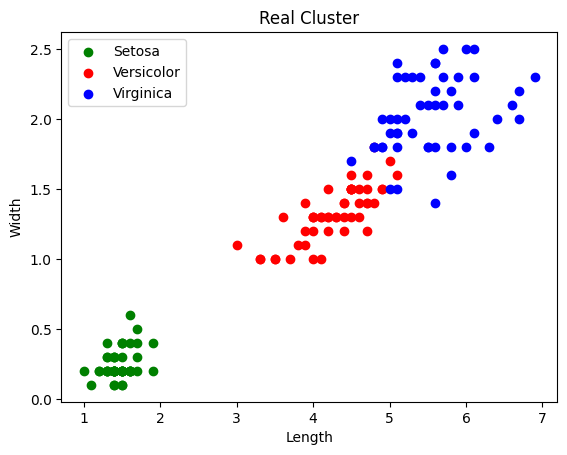

In [94]:
# Get dataframes for each real cluster
df1 = petals[petals['species'] == 0]
df2 = petals[petals['species'] == 1]
df3 = petals[petals['species'] == 2]

# Scatter plot of each real cluster
plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')

# Plot labels
plt.title('Real Cluster')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.show()

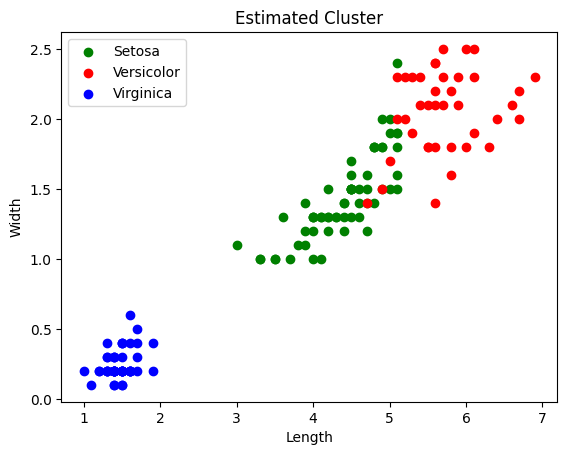

In [95]:
df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]
df3 = dataset[dataset['Cluster'] == 2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')

plt.title('Estimated Cluster')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(['Setosa','Versicolor','Virginica'])

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [96]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k = [2,3,4,5,6,7,8,9,10]

# For each k
for i in k:
    # Initialize
    km = KMeans(n_clusters=i, n_init="auto")
    # Do K-means clustering
    km.fit(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])
    # Append sse to the list
    sse.append(km.inertia_)

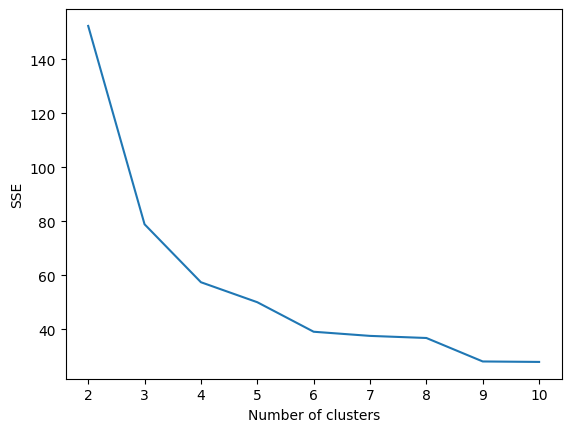

In [97]:
# Plot sse versus k
plt.plot(k, sse)
plt.xticks(k)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



Text(0, 0.5, 'Width')

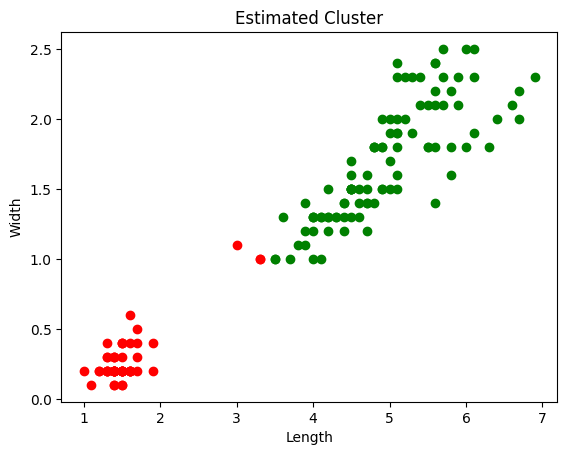

In [98]:
k=2
km = KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)
FlowePRedicted = km.fit_predict(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])

dataset['Cluster'] = FlowePRedicted

df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')

plt.title('Estimated Cluster')
plt.xlabel('Length')
plt.ylabel('Width')

Text(0, 0.5, 'Width')

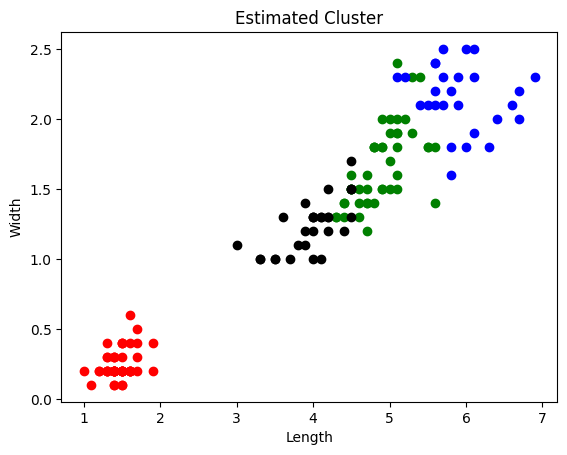

In [99]:
k=4
km = KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)
FlowePRedicted = km.fit_predict(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])

dataset['Cluster'] = FlowePRedicted

df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]
df3 = dataset[dataset['Cluster'] == 2]
df4 = dataset[dataset['Cluster'] == 3]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')
plt.scatter(df4['petal_length'],df4['petal_width'],color='black')

plt.title('Estimated Cluster')
plt.xlabel('Length')
plt.ylabel('Width')

Text(0, 0.5, 'Width')

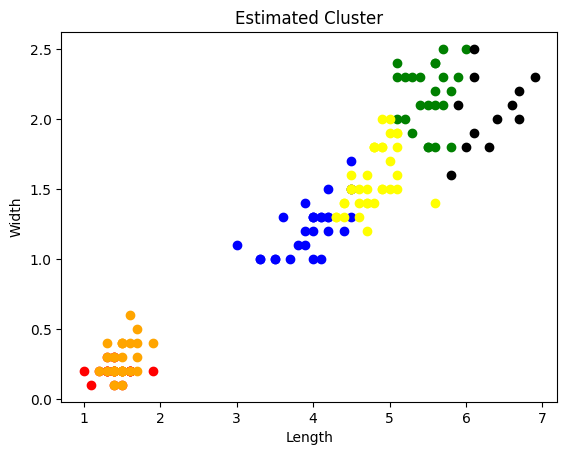

In [100]:
k=6
km = KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)
FlowePRedicted = km.fit_predict(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])

dataset['Cluster'] = FlowePRedicted

df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]
df3 = dataset[dataset['Cluster'] == 2]
df4 = dataset[dataset['Cluster'] == 3]
df5 = dataset[dataset['Cluster'] == 4]
df6 = dataset[dataset['Cluster'] == 5]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')
plt.scatter(df4['petal_length'],df4['petal_width'],color='black')
plt.scatter(df5['petal_length'],df5['petal_width'],color='yellow')
plt.scatter(df6['petal_length'],df6['petal_width'],color='orange')

plt.title('Estimated Cluster')
plt.xlabel('Length')
plt.ylabel('Width')

Text(0, 0.5, 'Width')

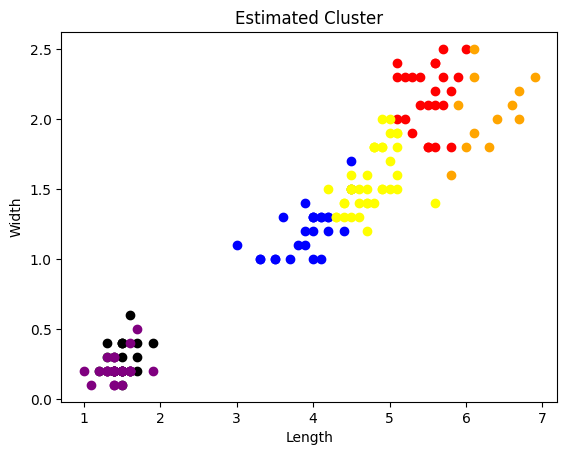

In [101]:
k=7
km = KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)
FlowePRedicted = km.fit_predict(dataset[['petal_length','petal_width','sepal_length', 'sepal_width']])

dataset['Cluster'] = FlowePRedicted

df1 = dataset[dataset['Cluster'] == 0]
df2 = dataset[dataset['Cluster'] == 1]
df3 = dataset[dataset['Cluster'] == 2]
df4 = dataset[dataset['Cluster'] == 3]
df5 = dataset[dataset['Cluster'] == 4]
df6 = dataset[dataset['Cluster'] == 5]
df7 = dataset[dataset['Cluster'] == 6]

plt.scatter(df1['petal_length'],df1['petal_width'],color='green')
plt.scatter(df2['petal_length'],df2['petal_width'],color='red')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue')
plt.scatter(df4['petal_length'],df4['petal_width'],color='black')
plt.scatter(df5['petal_length'],df5['petal_width'],color='yellow')
plt.scatter(df6['petal_length'],df6['petal_width'],color='orange')
plt.scatter(df7['petal_length'],df7['petal_width'],color='purple')

plt.title('Estimated Cluster')
plt.xlabel('Length')
plt.ylabel('Width')

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k